## Milestone 1

## Import libraries

In [1]:
%load_ext rpy2.ipython

In [2]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd

## GET request to list the available files

In [3]:
# Necessary metadata
article_id = 14096681  # this is the unique identifier of the article on figshare
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "figshare/"

In [4]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [5]:
%%time
files_to_dl = ["data.zip"]  # feel free to add other files here
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: user 2.51 s, sys: 2.59 s, total: 5.1 s
Wall time: 37.6 s


In [6]:
%%time
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

CPU times: user 16.3 s, sys: 2.38 s, total: 18.7 s
Wall time: 19.4 s


In [7]:
current_path = %pwd
data_path =  current_path + "/figshare"
%ls -ltr $data_path

total 13838056
drwxr-xr-x  30 macychan  staff        960 Mar 28 15:28 __MACOSX/
-rw-r--r--   1 macychan  staff  707986522 Mar 30 22:42 combined_data_2.feather
-rw-r--r--   1 macychan  staff  814041183 Mar 31 09:36 data.zip
-rw-r--r--   1 macychan  staff   95376895 Mar 31 09:37 MPI-ESM-1-2-HAM_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff   94960113 Mar 31 09:37 AWI-ESM-1-1-LR_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff   82474546 Mar 31 09:37 NorESM2-LM_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  127613760 Mar 31 09:37 ACCESS-CM2_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  232118894 Mar 31 09:37 FGOALS-f3-L_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  330360682 Mar 31 09:37 CMCC-CM2-HR4_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  254009247 Mar 31 09:37 MRI-ESM2-0_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  235661418 Mar 31 09:37 GFDL-CM4_daily_rainfall_NSW.csv
-rw-r--r--   1 macychan  staff  294260911 Mar 31 09:37 

## Combining data CSVs



In [8]:
%%time
files_to_combine = glob.glob(data_path + "/*.csv")
files_to_combine.remove(data_path + "/observed_daily_rainfall_SYD.csv")
df = pd.concat(
    (pd.read_csv(file, index_col=0, parse_dates=True)
                .assign(model=re.findall(r'[^\/&\\]+(?=_daily_rainfall_NSW\.)', file)[0])
                for file in files_to_combine)
    )
df.to_csv(current_path + "/combined_data.csv")

CPU times: user 7min 16s, sys: 17.5 s, total: 7min 33s
Wall time: 7min 43s


In [9]:
print(df.shape)

(62467843, 6)


In [10]:
df.head()

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.244226e-13,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.217326e-13,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.498125e-13,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.251282e-13,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.439867,-33.574619,141.5625,143.4375,4.270161e-13,MPI-ESM-1-2-HAM


## Load the combined CSV to memory and perform a simple EDA

In [11]:
df.shape

(62467843, 6)

**Observations:**

This is a relatively large dataset with 62,467,843 instances and 6 features. So, running the whole data set for data wrangling and analysis may be time-consuming. 

In [12]:
df.dtypes

lat_min          float64
lat_max          float64
lon_min          float64
lon_max          float64
rain (mm/day)    float64
model             object
dtype: object

**Observations:**

As the memory usage is quite large (around 3.7+ GB), running `df.info()` would not be an efficient way to extract data type information. Instead, we used `df.dtypes`, which gives desired information with minimal time. 

As we can observe from the result, there are five numerical features ("lat_min", "lat_max", "lon_min", "lon_max", "rain (mm/day)") and one categorical feature ("model"). And all numerical features is the data type of `float 64`, which consumes a lot of memory; therefore, we may think about changing data types to decrease the memory usage. 

### Change data types of numerical features

In [13]:
%%time
# Change data types of numerical features
data_types = {'lat_min': 'float16', 
          'lat_max': 'float16', 
          'lon_min': 'float16', 
          'lon_max': 'float16',
          'rain (mm/day)':'float16',
          'model':'str'}
df_1 = pd.read_csv(current_path + "/combined_data.csv", index_col=0, parse_dates=True, dtype=data_types)
print(df_1["model"].value_counts())

MPI-ESM1-2-HR       5154240
CMCC-CM2-HR4        3541230
CMCC-ESM2           3541230
CMCC-CM2-SR5        3541230
NorESM2-MM          3541230
TaiESM1             3541230
SAM0-UNICON         3541153
GFDL-ESM4           3219300
FGOALS-f3-L         3219300
GFDL-CM4            3219300
MRI-ESM2-0          3037320
EC-Earth3-Veg-LR    3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM4-8           1609650
INM-CM5-0           1609650
FGOALS-g3           1287720
KIOST-ESM           1287720
AWI-ESM-1-1-LR       966420
MPI-ESM1-2-LR        966420
NESM3                966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: user 1min 10s, sys: 8.45 s, total: 1min 18s
Wall time: 1min 21s


In [14]:
df_1.dtypes

lat_min          float16
lat_max          float16
lon_min          float16
lon_max          float16
rain (mm/day)    float16
model             object
dtype: object

In [15]:
len(df_1["model"].unique())

27

In [16]:
print(f"Memory usage with float64: {df.memory_usage().sum() / 1e6:.2f} MB")
print(f"Memory usage with float16: {df_1.memory_usage().sum() / 1e6:.2f} MB")

Memory usage with float64: 3498.20 MB
Memory usage with float16: 1624.16 MB


**Observations:**

By changing the data types of numerical features from `float 64` to `float 16`, we successfully reduce the memory usage by almost a half. However, we are not able to know the most suitable data type for each column before changing it.

There are 27 unique models in the data frame, and each of them has at least 550,000 instances. Additionally, the model has the highest number of examples is MPI-ESM1-2-HR, and the model with the lowest number of examples is CanESM5

### Load just the columns we want

In [17]:
%%time
# Choose columns, which are needed
use_cols = ['rain (mm/day)', 'model']
df_2 = pd.read_csv(current_path + "/combined_data.csv", usecols=use_cols)
print(df_2["model"].value_counts())

MPI-ESM1-2-HR       5154240
CMCC-CM2-HR4        3541230
CMCC-ESM2           3541230
CMCC-CM2-SR5        3541230
NorESM2-MM          3541230
TaiESM1             3541230
SAM0-UNICON         3541153
GFDL-ESM4           3219300
FGOALS-f3-L         3219300
GFDL-CM4            3219300
MRI-ESM2-0          3037320
EC-Earth3-Veg-LR    3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM4-8           1609650
INM-CM5-0           1609650
FGOALS-g3           1287720
KIOST-ESM           1287720
AWI-ESM-1-1-LR       966420
MPI-ESM1-2-LR        966420
NESM3                966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: user 32.6 s, sys: 2.56 s, total: 35.2 s
Wall time: 36.1 s


In [18]:
print(f"Original memory usage: {df.memory_usage().sum() / 1e6:.2f} MB")
print(f"Memory usage after loading selected columns: {df_2.memory_usage().sum() / 1e6:.2f} MB")

Original memory usage: 3498.20 MB
Memory usage after loading selected columns: 999.49 MB


**Observations:**

As our main interest is the rainfall, so in order to speed up the process, we only load the needed columns. By reducing the number of columns, we are able to significantly reduce the processing time . Also, the memory usage is way lower than the original data frame. However, we do not know which column would be unnecessary for future analysis. For example, if we would like to perform spatial visualization for rainfall, then latitude and longitude may be useful.

### Process data in chunks

In [19]:
%%time
#process data in chunks
df_3 = pd.Series(dtype=float)
for chunk in pd.read_csv(current_path + "/combined_data.csv", chunksize=10_000_000):
    df_3 = df_3.add(chunk["model"].value_counts(), fill_value=0)
print(df_3.astype(float))

ACCESS-CM2          1932840.0
ACCESS-ESM1-5       1610700.0
AWI-ESM-1-1-LR       966420.0
BCC-CSM2-MR         3035340.0
BCC-ESM1             551880.0
CMCC-CM2-HR4        3541230.0
CMCC-CM2-SR5        3541230.0
CMCC-ESM2           3541230.0
CanESM5              551880.0
EC-Earth3-Veg-LR    3037320.0
FGOALS-f3-L         3219300.0
FGOALS-g3           1287720.0
GFDL-CM4            3219300.0
GFDL-ESM4           3219300.0
INM-CM4-8           1609650.0
INM-CM5-0           1609650.0
KIOST-ESM           1287720.0
MIROC6              2070900.0
MPI-ESM-1-2-HAM      966420.0
MPI-ESM1-2-HR       5154240.0
MPI-ESM1-2-LR        966420.0
MRI-ESM2-0          3037320.0
NESM3                966420.0
NorESM2-LM           919800.0
NorESM2-MM          3541230.0
SAM0-UNICON         3541153.0
TaiESM1             3541230.0
dtype: float64
CPU times: user 1min, sys: 9.08 s, total: 1min 9s
Wall time: 1min 10s


**Observations:**

By loading data in chunks with chunk size of 10 millions, we can reduce the loading time and memory usage because we load a big file in small chunks and process on those chunks in an iterative way.

### Perform a simple EDA in R

In [20]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [21]:
%%R
#library(feather)
library(arrow)
library(dplyr, warn.conflicts = FALSE)

R[write to console]: 
Attaching package: ‘arrow’


R[write to console]: The following object is masked from ‘package:utils’:

    timestamp




#### Process data in chunks (`df_3`)

Since the Pandas Series is fairly small, it can easily be done with Pandas Exchange, aka IPython magic integration.

In [22]:
print(f"Memory usage of df_3: {df_3.memory_usage() / 1e3:.2f} KB")

Memory usage of df_3: 0.43 KB


In [23]:
%%time
%%R -i df_3
df_3

      ACCESS-CM2    ACCESS-ESM1-5   AWI-ESM-1-1-LR      BCC-CSM2-MR 
         1932840          1610700           966420          3035340 
        BCC-ESM1     CMCC-CM2-HR4     CMCC-CM2-SR5        CMCC-ESM2 
          551880          3541230          3541230          3541230 
         CanESM5 EC-Earth3-Veg-LR      FGOALS-f3-L        FGOALS-g3 
          551880          3037320          3219300          1287720 
        GFDL-CM4        GFDL-ESM4        INM-CM4-8        INM-CM5-0 
         3219300          3219300          1609650          1609650 
       KIOST-ESM           MIROC6  MPI-ESM-1-2-HAM    MPI-ESM1-2-HR 
         1287720          2070900           966420          5154240 
   MPI-ESM1-2-LR       MRI-ESM2-0            NESM3       NorESM2-LM 
          966420          3037320           966420           919800 
      NorESM2-MM      SAM0-UNICON          TaiESM1 
         3541230          3541153          3541230 
CPU times: user 42.1 ms, sys: 17.5 ms, total: 59.6 ms
Wall time: 55.

### Transfer the dataframe from python to R

#### Load just the columns we want (`df_1`)

`df_1` is close to 1.6GB.  One of the good ways for the dataframe to go from Python to R is that we save the the dataframe into 'feather' format and read it in R.  The alternative, less preferred way is to load it with Pandas Exchange (aka R magic / IPython) which will take a long time due to the size of the dataframe.

We tried both method - Feather file and Pandas exchange, and we decided to use Feather file. The reasons are twofold.  Firstly, the processing time of feather is significantly faster than pandas exchange.  Secondly, feather file can be passed to other analyses if needed. We do not need to implement the whole wrangling process next time we use the same dataframe.

#### Feather file

In [35]:
%%time
df_1.reset_index().to_feather(data_path + "/combined_data_2.feather")

CPU times: user 6.14 s, sys: 4.47 s, total: 10.6 s
Wall time: 9.86 s


In [36]:
df_1

,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
time,,,,,,
1889-01-01 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
1889-01-02 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
1889-01-03 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
1889-01-04 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
1889-01-05 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
...,...,...,...,...,...,...
2014-12-27 12:00:00,-30.15625,-29.21875,153.125,154.375,6.691406,SAM0-UNICON
2014-12-28 12:00:00,-30.15625,-29.21875,153.125,154.375,7.863281,SAM0-UNICON
2014-12-29 12:00:00,-30.15625,-29.21875,153.125,154.375,10.007812,SAM0-UNICON


In [37]:
%%time 
# Checking that the feather file is created correctly.
df_1_test = pd.read_feather(data_path + "/combined_data_2.feather")
df_1_test

CPU times: user 4.11 s, sys: 3.71 s, total: 7.82 s
Wall time: 3.94 s


,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
0,1889-01-01 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
1,1889-01-02 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
2,1889-01-03 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
3,1889-01-04 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
4,1889-01-05 12:00:00,-35.43750,-33.56250,141.500,143.500,0.000000,MPI-ESM-1-2-HAM
...,...,...,...,...,...,...,...
62467838,2014-12-27 12:00:00,-30.15625,-29.21875,153.125,154.375,6.691406,SAM0-UNICON
62467839,2014-12-28 12:00:00,-30.15625,-29.21875,153.125,154.375,7.863281,SAM0-UNICON
62467840,2014-12-29 12:00:00,-30.15625,-29.21875,153.125,154.375,10.007812,SAM0-UNICON
62467841,2014-12-30 12:00:00,-30.15625,-29.21875,153.125,154.375,8.539062,SAM0-UNICON


The following is the code for loading the dataframe into R from the feather file.

In [38]:
%%time
%%R -i data_path
df_1 <- read_feather(base::paste0(data_path, "/combined_data_2.feather"))
head(df_1)

# A tibble: 6 × 7
  time                lat_min lat_max lon_min lon_max `rain (mm/day)` model     
  <dttm>                <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>     
1 1889-01-01 04:00:00   53358   53298   22636   22652               0 MPI-ESM-1…
2 1889-01-02 04:00:00   53358   53298   22636   22652               0 MPI-ESM-1…
3 1889-01-03 04:00:00   53358   53298   22636   22652               0 MPI-ESM-1…
4 1889-01-04 04:00:00   53358   53298   22636   22652               0 MPI-ESM-1…
5 1889-01-05 04:00:00   53358   53298   22636   22652               0 MPI-ESM-1…
6 1889-01-06 04:00:00   53358   53298   22636   22652               0 MPI-ESM-1…
CPU times: user 7.32 s, sys: 11.8 s, total: 19.1 s
Wall time: 11.7 s


#### Pandas exchange

The following is the backup code (Pandas Exchange, commented out) just in case `arrow`'s reading of feather file does not execute correctly.  The following code will take about 14 minutes to run even with a slightly smaller dataframe `df_2` (1GB).  We also tried `df_1`, and it took about 2h 19mins.  The following code cells are for reference only and we do not recommend running them.

In [39]:
# %%time
# %%R -i df_2
# head(df_2) 

It takes a long time for Pandas Exchange to pass the `df_2` to R.  The following is the output from running the above cell one time:

```r
  rain (mm/day)           model
0  4.244226e-13 MPI-ESM-1-2-HAM
1  4.217326e-13 MPI-ESM-1-2-HAM
2  4.498125e-13 MPI-ESM-1-2-HAM
3  4.251282e-13 MPI-ESM-1-2-HAM
4  4.270161e-13 MPI-ESM-1-2-HAM
5  4.197289e-13 MPI-ESM-1-2-HAM
CPU times: user 12min 15s, sys: 1min 18s, total: 13min 33s
Wall time: 14min 27s
```

In [40]:
# %%R
# object.size(df_2)

For `df_1`:

In [28]:
# %%time
# %%R -i df_1
# head(df_1) 

   lat_min  lat_max lon_min lon_max rain (mm/day)           model
1 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
2 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
3 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
4 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
5 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
6 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
CPU times: user 1h 1min 25s, sys: 47min 1s, total: 1h 48min 26s
Wall time: 2h 19min 26s


It took 2h 19min 26s.

```r
   lat_min  lat_max lon_min lon_max rain (mm/day)           model
1 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
2 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
3 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
4 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
5 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
6 -35.4375 -33.5625   141.5   143.5             0 MPI-ESM-1-2-HAM
CPU times: user 1h 1min 25s, sys: 47min 1s, total: 1h 48min 26s
Wall time: 2h 19min 26s
```

In [ ]:
# %%R
# object.size(df_1)

The output:
```r
2998459512 bytes
```

### Simple EDA in R

In [41]:
%%time
%%R
glimpse(df_1)

Rows: 62,467,843
Columns: 7
$ time            <dttm> 1889-01-01 04:00:00, 1889-01-02 04:00:00, 1889-01-03 …
$ lat_min         <dbl> 53358, 53358, 53358, 53358, 53358, 53358, 53358, 53358…
$ lat_max         <dbl> 53298, 53298, 53298, 53298, 53298, 53298, 53298, 53298…
$ lon_min         <dbl> 22636, 22636, 22636, 22636, 22636, 22636, 22636, 22636…
$ lon_max         <dbl> 22652, 22652, 22652, 22652, 22652, 22652, 22652, 22652…
$ `rain (mm/day)` <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 16654, 10566, 0, 0, 0, 0, 5813…
$ model           <chr> "MPI-ESM-1-2-HAM", "MPI-ESM-1-2-HAM", "MPI-ESM-1-2-HAM…
CPU times: user 21.8 ms, sys: 8.85 ms, total: 30.7 ms
Wall time: 27.5 ms


The number of rows and columns as well as the data types of the 2 columns are shown above.

In [42]:
%%time
%%R
summary(df_1)

      time                        lat_min           lat_max     
 Min.   :1888-12-31 16:00:00   Min.   :53114     Min.   :52986  
 1st Qu.:1920-07-02 04:00:00   1st Qu.:53210     1st Qu.:53130  
 Median :1952-01-01 04:00:00   Median :53280     Median :53249  
 Mean   :1952-01-01 08:32:09   Mean   :53271     Mean   :53220  
 3rd Qu.:1983-07-02 05:00:00   3rd Qu.:53340     3rd Qu.:53301  
 Max.   :2014-12-31 04:00:00   Max.   :53391     Max.   :53376  
                               NA's   :3219300                  
    lon_min           lon_max      rain (mm/day)        model          
 Min.   :22629     Min.   :22634   Min.   :    0     Length:62467843   
 1st Qu.:22652     1st Qu.:22664   1st Qu.:  587     Class :character  
 Median :22679     Median :22689   Median :11582     Mode  :character  
 Mean   :22679     Mean   :22690   Mean   :10074                       
 3rd Qu.:22706     3rd Qu.:22714   3rd Qu.:15633                       
 Max.   :22734     Max.   :22749   Max.   :32768

In [43]:
%%R
df_1 <- df_1 |>
    rename(rain = "rain (mm/day)")
head(df_1)
    

# A tibble: 6 × 7
  time                lat_min lat_max lon_min lon_max  rain model          
  <dttm>                <dbl>   <dbl>   <dbl>   <dbl> <dbl> <chr>          
1 1889-01-01 04:00:00   53358   53298   22636   22652     0 MPI-ESM-1-2-HAM
2 1889-01-02 04:00:00   53358   53298   22636   22652     0 MPI-ESM-1-2-HAM
3 1889-01-03 04:00:00   53358   53298   22636   22652     0 MPI-ESM-1-2-HAM
4 1889-01-04 04:00:00   53358   53298   22636   22652     0 MPI-ESM-1-2-HAM
5 1889-01-05 04:00:00   53358   53298   22636   22652     0 MPI-ESM-1-2-HAM
6 1889-01-06 04:00:00   53358   53298   22636   22652     0 MPI-ESM-1-2-HAM


In [44]:
%%R
library(ggplot2)

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



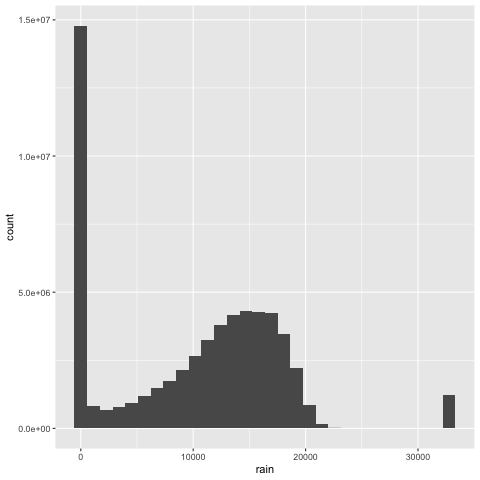

CPU times: user 30.5 s, sys: 11.3 s, total: 41.8 s
Wall time: 44.7 s


In [45]:
%%time
%%R
hist <- df_1 |>
    ggplot(aes(x=rain)) +
    geom_histogram()
hist

As can be seen above, the majority of the values in the `rain` column are very small.

## Compare performance

#### Performance for Combining Data CSV

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Joyce Wang  |     Windows      |16GB | 11th Gen Intel(R) Core(TM) i7-1165G7 2.80GHz | yes | 9min 29s |
| Macy Chan   |     Mac          |16GB | 2.6 GHz 6-Core Intel Core i7                 | yes | 7min 19s |
| Steven Leung|          Mac           |  16GB   |     Apple M1      |    yes    |     7min 25s       |
| Zack Tang   |     Mac          |16GB | 2.2 GHz 6-Core Intel Core i7                 | yes | 7min 25s |      

#### Performance for EDA in python (Changing data types)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Joyce Wang  |        Windows          | 16GB    | 11th Gen Intel(R) Core(TM) i7-1165G7 2.80GHz          |  yes      | 3mins 48s           |
| Macy Chan   |     Mac          |16GB | 2.6 GHz 6-Core Intel Core i7                 | yes | 1min 7s |
| Steven Leung|       Mac           |  16GB   |     Apple M1      |    yes    |     1min 2s       |
| Zack Tang   |     Mac         |   16GB  |       2.2 GHz 6-Core Intel Core i7    |    yes    | 1min 2s |

#### Performance for EDA in python (Loading what is needed)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Joyce Wang  |     Windows             | 16GB    | 11th Gen Intel(R) Core(TM) i7-1165G7 2.80GHz          |  yes      | 1min 26s           |
| Macy Chan   |     Mac          |16GB | 2.6 GHz 6-Core Intel Core i7                 | yes | 31.8s |
| Steven Leung|      Mac           |  16GB   |     Apple M1      |    yes    |     30.3s       |
| Zack Tang   |     Mac         |   16GB  |       2.2 GHz 6-Core Intel Core i7    |    yes    | 30.9s |

#### Performance for EDA in python (Loading data in chunks)

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Joyce Wang  |    Windows              | 16GB    | 11th Gen Intel(R) Core(TM) i7-1165G7 2.80GHz           | yes       | 2mins 16s           |
| Macy Chan   |     Mac          |16GB | 2.6 GHz 6-Core Intel Core i7                 | yes |  59.5 s |
| Steven Leung|      Mac           |  16GB   |     Apple M1      |    yes    |     52.3s       |
| Zack Tang   |     Mac         |   16GB  |       2.2 GHz 6-Core Intel Core i7    |    yes    | 1min 3s |



## Challenges and difficulties
The main challenges or difficulties we faced when dealing with large data on our local laptop are the memory usage and speed required to process the data due to its volume. In order to overcome these challenges, we used several approaches. As already mentioned above, to check the dataframe data type, we used `df.dtype()` instead of `df.info()` so we do not carry out unnecessary computations. We changed numerical data from `float 64` to `float 16` as well as loading only columns needed to further reduce memory usage. We also tried loading the data in chucks instead of in full to reduce memory usage. Lastly, to transfer the dataframe from python to R, we saved the data as a feather file instead of using pandas exchange, allowing for lower memory usage and much less time required to process the data. 

For the time taken to download, unzip and write to csv when combining the data, we were unable to speed up this process since the computation needed to be done in full and sequentially. 